<a href="https://colab.research.google.com/github/SuhyeonHa/MatrixComputation/blob/master/Assignment11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text classification using neural networks

This assignment aims to build a binary classifier for text data based on neural networks. The classifier is designed to classify input review text data into positive or negative.

#### 1. Text Data

- the data directory ('movie_review') consists of two sub-directories ('pos') and ('neg') for positive and negative, respectively
- each sub-directory includes a list of files for review texts
- the preprocessing given by the below codes transforms each text into the frequency information

#### 2. Neural Networks Architecture

https://gitlab.com/byungwoohong/class-2020-1-machinelearning/-/blob/master/assignment/11/assignment-11.md

- build a classifier using neural networks for the text cateogrization with binary labels that are either positive or negative
- construct a neural network that consists of an input layer, an output layer and a sequence of hidden layers
- each hidden layer is defined by a logistic unit
- a logistic unit consists of a fully connected layer with a bias followed by the sigmoid activation function 
- you are allowed to determine the number of hidden layers and their dimensions as you want

#### 3. Sigmoid function as an activation function

- $\sigma(z) = \frac{1}{1 + \exp(-z)}$
- $\sigma^{\prime}(z) = \sigma(z) (1 - \sigma(z))$

#### 4. Objective Function

- $J(\theta) = \frac{1}{m} \sum_{i=1}^m ( - l^{(i)} \log( h^{(i)} ) - (1 - l^{(i)}) \log(1 - h^{(i)}) ) + \frac{\lambda}{2 n} \sum_{j=1}^n \theta_j^2$ 
- $\theta_j$ denotes a model parameter where $j = 1, 2, \cdots, n$
- $\lambda$ is a control parameter for the regularization based on the $L_2^2$-norm (weight decay)
- $n$ is the total number of all the model parameters over the entire neural network
- $h^{(i)}$ denotes the output layer for $i$-th sample data

#### 5. Gradient Descent (Back-propagation)

- $\theta_{j}^{(t+1)} := \theta_{j}^{(t)} - \alpha \frac{\partial J(\theta^{(t)})}{\partial \theta_{j}}$, for all $j$
- you should choose a learning rate $\alpha$ in such a way that the convergence is achieved
- you can use random initial conditions $\theta_j^{(0)}$ for all $j$ following a normal distribution with mean 0 and stardard deviation some number

#### 6. Codes for Data Preprocessing

- the data preprocessing steps aim to transform text data into informative quantity with respect to the class
- it is allowed to use any embedding scheme to trainsform text data into descriptors using any libraries
- the classified should be developed by your own codes (use of library is not allowed)


- [Tutorial for `load_files`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_files.html)
- [Tutorial for `stopwords`](https://pythonspot.com/nltk-stop-words/)
- [Tutorial for `WordNetLemmatizer`](https://www.datacamp.com/community/tutorials/stemming-lemmatization-python)
- [Tutorial for `Regex`](https://stackabuse.com/using-regex-for-text-manipulation-in-python/)
- [Tutorial for `bag-of-words`](https://en.wikipedia.org/wiki/Bag-of-words_model)
- [Tutorial for `CountVectorizer`](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)
- [Tutorial for `TfidfVectorizer`](https://kavita-ganesan.com/tfidftransformer-tfidfvectorizer-usage-differences/)
- [Tutorial for `train_test_split`](https://www.bitdegree.org/learn/train-test-split)

#### 7. Training

- the training data is constructed by taking the first 70% of the data
- the training should be performed using the training data
 
#### 8. Testing

- the testing data is constructed by taking the last 30% of the data
- the testing should be performed using the testing data

#### 9. Determination of the prediction

- $l^* = \begin{cases} 0 & : h < 0.5 \\ 1 & : h \ge 0.5 \end{cases}$

#### 10. Codes for Classification


#### 11. Codes for Evaluation

- [Tutorial for Confusion Matrix](https://en.wikipedia.org/wiki/Confusion_matrix)
- [Tutorial for Precision and Recall](https://en.wikipedia.org/wiki/Precision_and_recall)
- [Tutorial for F1 score](https://en.wikipedia.org/wiki/F1_score)

#### 12. Confusion Matrix

|                 |          | Actual Class   |                |
| --------------- | :------: | :------------: | :------------: |
|                 |          | Positive       | Negative       |
| Predicted Class | Positive | True Positive  | False Positive |
|                 | Negative | False Negative | True Negative  |

#### 13. F1 score

- $\text{precision} = \frac{\text{true positive}}{\text{true positive} + \text{false positive}}$
- $\text{recall} = \frac{\text{true positive}}{\text{true positive} + \text{false negative}}$
- $F_1 = 2 \cdot \frac{\text{precision} \cdot \text{recall}}{\text{precision} + \text{recall}}$

#### 14. Compute the accuracy

- the accuracy is computed by $\frac{\textrm{number of correct predictions}}{\textrm{total number of predictions}}$

#### 15. Regularization

- you can choose a value for the regularization parameter $\lambda$ in such a way that the best `testing accuracy` can be achieved


## Maching Learning Lecture
~ Lecture 10

https://www.youtube.com/playlist?list=PLLssT5z_DsK-h9vYZkQkYNWcItqhlRJLN

In [2]:
import numpy as np
import re
import nltk
from sklearn.datasets import load_files
nltk.download('stopwords')
nltk.download('wordnet')
import pickle
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split

file_data   = '/content/drive/My Drive/Colab Notebooks/MatrixComputation/movie_review'
review_data = load_files(file_data)
X, y = review_data.data, review_data.target

documents = []

stemmer = WordNetLemmatizer()

for sen in range(0, len(X)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(X[sen]))
    
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    
    # Converting to Lowercase
    document = document.lower()
    
    # Lemmatization
    document = document.split()
    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    
    documents.append(document)

vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(documents).toarray()

tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
# make data shape as (feature, num_data)
X_train = X_train.T
X_test = X_test.T

In [4]:
print(f'X_train.shape: {X_train.shape}')
print(f'X_test.shape: {X_test.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'y_test.shape: {y_test.shape}')

X_train.shape: (1500, 1401)
X_test.shape: (1500, 601)
y_train.shape: (1401,)
y_test.shape: (601,)


In [0]:
# forward propagation used for prediction
def forward_prop(x, theta_1, theta_2, theta_3, bias_1, bias_2, bias_3):
  # layer 1
  a_1 = x
  # print(f'a_1.shape: {a_1.shape}')

  # layer 2
  y_ = np.matmul(theta_1.T, x) + bias_1
  # print(f'y_: {y_}')
  y = 1 / (1 + np.exp(-1 * y_))
  a_2 = y
  # print(f'a_2.shape: {a_2.shape}')

  # layer 3
  z_ = np.matmul(theta_2.T, y) + bias_2
  # print(f'z_: {z_}')
  z = 1 / (1 + np.exp(-1 * z_))
  a_3 = z

  # print(f'a_3.shape: {a_3.shape}')

  # layer 4
  h_ = np.matmul(theta_3.T, z) + bias_3
  # print(f'h_: {h_}')
  h = 1 / (1 + np.exp(-1 * h_))
  a_4 = h
  # print(f'a_4.shape: {a_4.shape}')

  return a_1, a_2, a_3, a_4

In [0]:
# forward propagation used for training
def forward_prop_with_dropout(x, theta_1, theta_2, theta_3, bias_1, bias_2, bias_3, drop_rate):
  # layer 1
  a_1 = x
  # print(f'a_1.shape: {a_1.shape}')

  # layer 2
  y_ = np.matmul(theta_1.T, x) + bias_1
  # print(f'y_: {y_}')
  y = 1 / (1 + np.exp(-1 * y_))
  a_2 = y
  d_2 = np.random.rand(y.shape[0]) > drop_rate # dropout
  y *= d_2
  # print(f'a_2.shape: {a_2.shape}')

  # layer 3
  z_ = np.matmul(theta_2.T, y) + bias_2
  # print(f'z_: {z_}')
  z = 1 / (1 + np.exp(-1 * z_))
  a_3 = z
  d_3 = np.random.rand(z.shape[0]) > drop_rate # dropout
  z *= d_3
  # print(f'a_3.shape: {a_3.shape}')

  # layer 4
  h_ = np.matmul(theta_3.T, z) + bias_3
  # print(f'h_: {h_}')
  h = 1 / (1 + np.exp(-1 * h_))
  a_4 = h
  # print(f'a_4.shape: {a_4.shape}')

  return a_1, a_2, a_3, a_4, d_2, d_3

In [0]:
# back propagation for updating theta
def back_prop(m, U, V, W,
              a_1, a_2, a_3, a_4,
              bias_1, bias_2, bias_3,
              d_2, d_3, train_label,
              lr, accuracy_count, loss, control_param):
  
  if a_4 < 0.5:
    pred_label = 0
  else:
    pred_label = 1
  gt_label = train_label[m]
  # print(f'gt_label: {gt_label}')
  # print(f'pred_label.shape: {pred_label}')

  if pred_label == gt_label:
    accuracy_count += 1
  loss += loss_func(a_4, gt_label)
  
  delta_4 = a_4 - gt_label
  # print(f'delta_4.shape: {delta_4.shape}')
  delta_3 = np.dot(W, delta_4)*a_3*(1-a_3)
  # print(f'delta_3.shape: {delta_3.shape}')
  delta_2 = np.dot(V, delta_3)*a_2*(1-a_2)
  # print(f'delta_2.shape: {delta_2.shape}')

  a_2 *= d_2
  a_3 *= d_3
  
  a_4 = a_4.reshape((1, 1))
  a_3 = a_3.reshape((30, 1))
  a_2 = a_2.reshape((500, 1))
  a_1 = a_1.reshape((1500, 1))

  delta_4 = delta_4.reshape((1, 1))
  delta_3 = delta_3.reshape((30, 1))
  delta_2 = delta_2.reshape((500, 1))

  grad_3 = np.dot(a_3, delta_4.T)
  # print(f'grad_3.shape: {grad_3.shape}')
  grad_2 = np.dot(a_2, delta_3.T)
  # print(f'grad_2.shape: {grad_2.shape}')
  grad_1 = np.dot(a_1, delta_2.T)
  # print(f'grad_1.shape: {grad_1.shape}')

  D_3 = grad_3 + control_param*W
  D_2 = grad_2 + control_param*V
  D_1 = grad_1 + control_param*U

  delta_4 = delta_4.reshape((1,))
  delta_3 = delta_3.reshape((30,))
  delta_2 = delta_2.reshape((500,))

  new_bias_1 = bias_1 - lr * delta_2
  new_bias_2 = bias_2 - lr * delta_3
  new_bias_3 = bias_3 - lr * delta_4

  new_W = W - lr*D_3
  new_V = V - lr*D_2
  new_U = U - lr*D_1

  return new_U, new_V, new_W, new_bias_1, new_bias_2, new_bias_3, accuracy_count, loss

In [0]:
def loss_func(pred_prob, gt_label):
  # print(f'pred_prob: {pred_prob}')
  # print(f'gt_label: {gt_label}')
  temp = -gt_label*np.log(pred_prob)-(1-gt_label)*np.log(1-pred_prob)
  # print(f'temp.shape: {temp.shape}')
  return np.mean(temp)

In [0]:
class Classifier:
  def __init__(self, U, V, W, b_1, b_2, b_3):
    self.U = U
    self.V = V
    self.W = W
    self.b_1 = b_1
    self.b_2 = b_2
    self.b_3 = b_3

  def predict(self, data):
    num_data = data.shape[1]
    pred_label = np.zeros(num_data)
    for m in range(num_data):
      x = data[:, m]
      a_1, a_2, a_3, a_4 = forward_prop(x, self.U, self.V, self.W, self.b_1, self.b_2, self.b_3)
      if a_4 < 0.5:
        pred_label[m] = 0
      else:
        pred_label[m] = 1
    return pred_label

In [0]:
def train_classifier(X_train, y_train, X_test, y_test):

  num_train = X_train.shape[1]
  num_test = X_test.shape[1]
  print(f'num_train: {num_train}')
  print(f'num_test: {num_test}')

  # My Neural Networks Architecture
  # layer1 = 1500
  # layer2 = 500
  # layer3 = 30
  # layer4 = 1

  U = np.random.normal(0.0, 1.0, size=(1500, 500))
  V = np.random.normal(0.0, 1.0, size=(500, 30))
  W = np.random.normal(0.0, 1.0, size=(30, 1))

  b_1 = np.random.normal(0.0, 1.0, size=(500))
  b_2 = np.random.normal(0.0, 1.0, size=(30))
  b_3 = np.random.normal(0.0, 1.0, size=(1))

  epochs = 80
  lr = 1e-1 # learning_rate
  control_param = 1e-6
  decay_step = 20

  num_param = U.shape[0]*U.shape[1]+V.shape[0]*V.shape[1]+W.shape[0]*W.shape[1]
  num_theta = 3

  train_loss_list = []
  train_accuracy_list = []
  test_loss_list = []
  test_accuracy_list = []
  right_pred_list = []
  wrong_pred_list = []

  for itr in range(epochs):
    accr_cnt = 0
    loss = 0

    if itr != 0 and itr % decay_step == 0:
      lr = lr*0.01
    
    for m in range(num_train):
      x = X_train[:, m]
      a_1, a_2, a_3, a_4, d_2, d_3 = forward_prop_with_dropout(x, U, V, W, b_1, b_2, b_3, 0.1)
      U, V, W, b_1, b_2, b_3, accr_cnt, loss = back_prop(m, U, V, W,
                                                        a_1, a_2, a_3, a_4,
                                                        b_1, b_2, b_3,
                                                        d_2, d_3, y_train,
                                                        lr, accr_cnt, loss,
                                                        control_param)
      # print(m, accr_cnt)
    
    # print(f'before loss: {loss}')
    loss += (np.sum(U**2)+np.sum(V**2)+np.sum(W**2))*control_param/(2*num_theta)
    # print(f'aft loss: {loss}')
    train_loss = loss/num_train
    train_loss_list.append(train_loss)
    train_accr = (accr_cnt/num_train)*100
    train_accuracy_list.append(train_accr)

    # test
    accr_cnt = 0
    loss = 0
    for m in range(num_test):
        x = X_test[:, m]
        a_1, a_2, a_3, a_4 = forward_prop(x, U, V, W, b_1, b_2, b_3)
        if a_4 < 0.5:
          pred_label = 0
        else:
          pred_label = 1
        gt_label = y_test[m]
        # print(f'gt_label: {gt_label}')
        # print(f'pred_label.shape: {pred_label}')

        if pred_label == gt_label:
          accr_cnt += 1
          right_pred_list.append((m, pred_label))
        else:
          wrong_pred_list.append((m, pred_label))
        loss += loss_func(a_4, gt_label)
        
    # print(f'before loss: {loss}')
    loss += (np.sum(U**2)+np.sum(V**2)+np.sum(W**2))*control_param/(2*num_theta)
    # print(f'aft loss: {loss}')
    test_loss = loss/num_test
    test_loss_list.append(test_loss)
    test_accr = (accr_cnt/num_test)*100
    test_accuracy_list.append(test_accr)

    if (itr+1) % 10 == 0:
      print(f'itr: {itr+1}')
      print(f'train_loss: {train_loss}')
      print(f'train_accr: {train_accr}')
      print(f'test_loss: {test_loss}')
      print(f'test_accr: {test_accr}')

  print(f'max_test_accuracy: {max(test_accuracy_list)}')

  classifier = Classifier(U, V, W, b_1, b_2, b_3)

  return classifier, train_loss_list, train_accuracy_list,\
  test_loss_list, test_accuracy_list, right_pred_list, wrong_pred_list, epochs

In [14]:
classifier, train_loss_list, train_accuracy_list, test_loss_list,\
test_accuracy_list, right_pred_list, wrong_pred_list,\
epochs = train_classifier(X_train, y_train, X_test, y_test)

num_train: 1401
num_test: 601
itr: 10
train_loss: 0.668800014348602
train_accr: 60.599571734475376
test_loss: 0.7111745011513754
test_accr: 51.9134775374376
itr: 20
train_loss: 0.5083846051590494
train_accr: 74.80371163454676
test_loss: 0.636440491109032
test_accr: 64.39267886855241
itr: 30
train_loss: 0.4530328459935338
train_accr: 79.08636688079943
test_loss: 0.5459041186343945
test_accr: 73.71048252911814
itr: 40
train_loss: 0.4576434758567605
train_accr: 78.30121341898644
test_loss: 0.545516661731782
test_accr: 73.04492512479202
itr: 50
train_loss: 0.4411229169178564
train_accr: 78.0870806566738
test_loss: 0.5444893331816815
test_accr: 73.37770382695507
itr: 60
train_loss: 0.4404572956392863
train_accr: 79.87152034261243
test_loss: 0.5436847238383192
test_accr: 73.21131447587355
itr: 70
train_loss: 0.44904660467080687
train_accr: 78.0870806566738
test_loss: 0.5436767872991031
test_accr: 73.21131447587355
itr: 80
train_loss: 0.45369214767290883
train_accr: 78.94361170592434
test_los

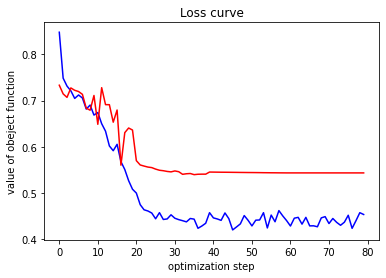

In [15]:
import matplotlib.pyplot as plt
plt.plot(range(epochs), train_loss_list, c='b')
plt.plot(range(epochs), test_loss_list, c='r')
plt.xlabel('optimization step')
plt.ylabel('value of obeject function')
plt.title('Loss curve')
plt.show()

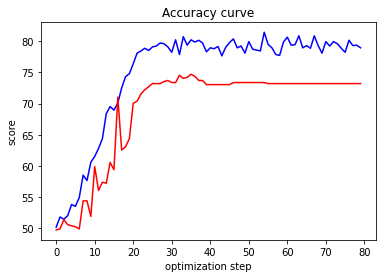

In [16]:
plt.plot(range(epochs), train_accuracy_list, c='b')
plt.plot(range(epochs), test_accuracy_list, c='r')
plt.xlabel('optimization step')
plt.ylabel('score')
plt.title('Accuracy curve')
plt.show()

In [0]:
y_pred_test = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_train,y_pred_train))
print(classification_report(y_train,y_pred_train))
print(accuracy_score(y_train, y_pred_train))

print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))
print(accuracy_score(y_test, y_pred_test))

[[555 144]
 [ 68 634]]
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       699
           1       0.81      0.90      0.86       702

    accuracy                           0.85      1401
   macro avg       0.85      0.85      0.85      1401
weighted avg       0.85      0.85      0.85      1401

0.8486795146324054
[[197 105]
 [ 56 243]]
              precision    recall  f1-score   support

           0       0.78      0.65      0.71       302
           1       0.70      0.81      0.75       299

    accuracy                           0.73       601
   macro avg       0.74      0.73      0.73       601
weighted avg       0.74      0.73      0.73       601

0.7321131447587355


In [19]:
# Print testing accuracy
print(f'Final testing accuracy(%): {test_accuracy_list[-1]}')

Final testing accuracy(%): 73.21131447587355
